In [146]:
import math
import re
import os
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [128]:
pd.set_option('display.max_columns',None)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#train = train.sample(frac=1)

In [129]:
train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [130]:
add = []
for i in train["ADDRESS"]:
    add.append(i.split(",")[1])

In [131]:
for i in add:
    if i == '':
        print(add.index(i))

In [132]:
train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [133]:
train["add"] = add

In [134]:
train = train.drop("ADDRESS",axis = 1)

In [135]:
train.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
add                      0
dtype: int64

In [136]:
x_train = train.drop('TARGET(PRICE_IN_LACS)',axis = 1)
y_train = train["TARGET(PRICE_IN_LACS)"]

In [137]:
x_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,add
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,Agra
29447,Owner,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,Lake View Recidency
29448,Dealer,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,Jaipur
29449,Owner,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,Chennai


In [138]:
def address_to_index(col):
    address = x_train[col]
    address = address.tolist()
    distinct_address = list(set(address))
    idx = [i for i in range(len(distinct_address))]
    #print(distinct_address, idx)
    add_to_idx = dict(zip(distinct_address, idx))
    return add_to_idx

In [139]:
x1 = np.array(x_train)
        

In [140]:
add_dict = address_to_index('add')


In [141]:
for i in range(len(x1)):
    a = (x1[i][10])
    x1[i][10] = add_dict[a]

In [142]:
print(x1)

[['Owner' 0 0 ... 12.96991 77.59796 325]
 ['Dealer' 0 0 ... 12.274538 76.644605 285]
 ['Owner' 0 0 ... 12.778033 77.632191 325]
 ...
 ['Dealer' 0 0 ... 26.928785 75.828002 30]
 ['Owner' 0 0 ... 12.90015 80.22791 15]
 ['Dealer' 0 1 ... 26.832353 75.841749 30]]


In [143]:
x_train = pd.DataFrame(x1, columns = ['POSTED_BY' ,'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.' ,'BHK_OR_RK', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE' ,'LONGITUDE', 'LATITUDE','add'])

In [144]:
x_train1 = pd.get_dummies(x_train, columns = ['POSTED_BY','BHK_OR_RK'])

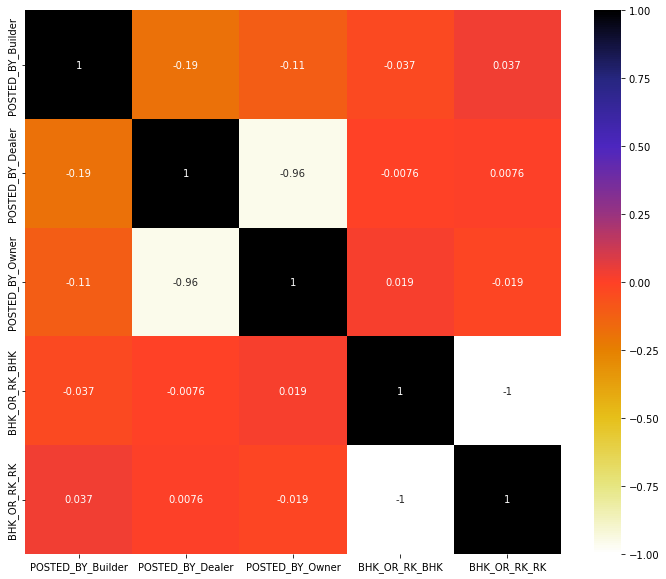

In [147]:
plt.figure(figsize=(12,10))
cor = x_train1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [148]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [149]:
corr_features = correlation(x_train1, 0.85)
print(len(set(corr_features)))
print(corr_features)

2
{'BHK_OR_RK_RK', 'POSTED_BY_Owner'}


In [150]:
x_train1 = x_train1.drop(corr_features,axis = 1)

In [151]:
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
trans1 = StandardScaler()
trans2 = MinMaxScaler()



In [152]:
x_train1 = trans2.fit_transform(trans1.fit_transform(x_train1))

In [153]:
print(y_train)

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29451, dtype: float64


In [154]:
y_train = np.array(y_train)

In [155]:
print(y_train)

[55.  51.  43.  ... 27.1 67.  27.8]


In [162]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(x_train1,y_train,test_size = 0.1)

In [215]:
from sklearn.preprocessing import PolynomialFeatures
poly =  PolynomialFeatures(degree = 3, include_bias = False)
poly_features_train = poly.fit_transform(x_train)
poly_features_val = poly.transform(x_val)

In [216]:
#poly_features = poly_features.reshape(29451,-1)

In [217]:
#poly_features = trans2.fit_transform(trans1.fit_transform(poly_features))

In [218]:
print(poly_features_train.shape)

(26505, 454)


In [219]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [220]:
from sklearn.linear_model import LinearRegression,HuberRegressor,TheilSenRegressor,LassoLars

In [221]:
poly_reg_model1 = RandomForestRegressor()
poly_reg_model2 = KNeighborsRegressor()
poly_reg_model3 = DecisionTreeRegressor()
poly_reg_model4 = HuberRegressor()
poly_reg_model5 = TheilSenRegressor()
poly_reg_model6 = LassoLars( fit_intercept = False,positive = True)
poly_reg_model1.fit(poly_features_train,y_train)

RandomForestRegressor()

In [230]:
y_predicted =poly_reg_model1.predict(poly_features_train)


In [231]:
np.max(y_predicted)

26534.93

In [232]:
for i in y_predicted:
    print(i)

109.63357142857143
36.93866666666667
34.856904761904765
78.87633333333333
27.446799186827064
29.89566666666667
149.7
638.5
24.132146159351166
25.958
115.32666666666665
39.601
72.07816666666659
37.948
34.38399999999997
30.821333333333335
106.64666666666675
31.288499999999985
111.20392023065105
60.847291666666685
37.748999999999995
51.796499999999995
41.18200000000001
52.97099999999997
52.67533333333333
100.78900000000002
26.240612878787875
46.35949999999999
69.29185476190477
157.40666666666667
301.22
57.253245825199926
36.286193759018744
66.91198385766836
75.00510000000007
75.675
35.39
42.03523347763348
116.88857142857142
26.09195
25.31
45.788190476190465
104.54
42.43450000000001
46.85699999999999
26.095333333333336
75.88999999999999
55.55164681777687
43.701864285714294
58.67717695360195
103.08183333333335
35.96673333333334
67.92916666666667
52.60785714285715
105.27324999999999
126.9870634920635
146.3760476190476
28.7456
38.25075
91.85770576265877
85.81299999999999
51.05516666666669
83.

In [233]:
print(y_val)

[260.   28.9  55.  ... 260.   90.  160. ]


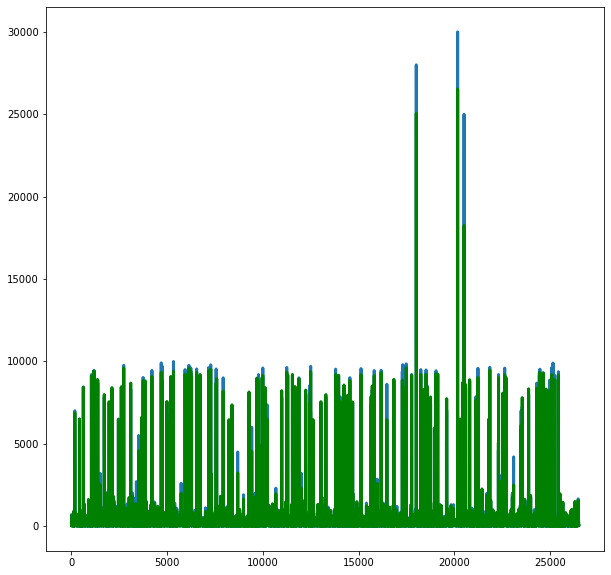

In [234]:
plt.figure(figsize = (10,10))
plt.plot(y_train,linewidth=3, label = "actual values")
plt.plot(y_predicted,c = 'g', linewidth=3,label = "predicted values")

In [235]:
print(y_predicted)

[109.63357143  36.93866667  34.85690476 ...  66.21231667  32.795
  35.91      ]


In [236]:
from sklearn.metrics import mean_squared_log_error

In [238]:
print(np.sqrt(mean_squared_log_error(y_train,y_predicted)))

0.20729451614132371
